### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('joined_nba_data', index_col = 0)

In [9]:
data.head(5)

,Player,Pos,Tm,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,label,2018-19,Guaranteed
0,Alex Abrines,SG,OKC,0.567,0.759,0.158,2.5,8.9,5.6,3.4,...,1.0,2.2,0.094,-0.5,-1.7,-2.2,-0.1,5,5455236.0,5455236.0
1,Quincy Acy,PF,BRK,0.525,0.800,0.164,3.1,17.0,10.0,6.0,...,1.1,1.0,0.036,-2.0,-0.2,-2.2,-0.1,0,0.0,0.0
2,Steven Adams,C,OKC,0.630,0.003,0.403,16.6,13.9,15.3,5.5,...,3.0,9.7,0.187,2.2,1.1,3.3,3.3,1,24157303.0,77528090.0
3,Bam Adebayo,C,MIA,0.570,0.021,0.526,9.7,21.6,15.6,11.0,...,1.9,4.2,0.148,-1.6,1.8,0.2,0.8,1,2955840.0,2955840.0
4,LaMarcus Aldridge,C,SAS,0.570,0.068,0.296,10.8,17.3,14.0,11.3,...,3.5,10.9,0.209,3.0,0.3,3.3,3.3,8,22347015.0,55347015.0


### Understanding the clusters

In [15]:
for i in list(range(0,10)):
    print("Group {} includes players such as {}\n".format(i, list(set(data[data.label==i]['Player'][0:10]))))

Group 0 includes players such as ['Carmelo Anthony', 'Alec Burks', 'Quincy Acy', 'Dillon Brooks', 'Malcolm Delaney', 'Vince Carter', 'Ian Clark', 'Zach Collins', 'Sam Dekker', 'Dragan Bender']

Group 1 includes players such as ['Jarrett Allen', 'Steven Adams', 'Pau Gasol', 'Rudy Gobert', 'Ed Davis', 'Derrick Favors', 'Bam Adebayo', 'John Collins', 'Joel Embiid', 'Jordan Bell']

Group 2 includes players such as ['Aaron Gordon', 'Taj Gibson', 'Davis Bertans', 'Trevor Ariza', 'Jaylen Brown', 'DeMarre Carroll', 'Ryan Anderson', 'Kentavious Caldwell-Pope', 'Nemanja Bjelica', 'Al-Farouq Aminu']

Group 3 includes players such as ['Corey Brewer', 'Danny Green', 'Mario Chalmers', 'Nicolas Batum', 'Lonzo Ball', 'Kris Dunn', 'Manu Ginobili', 'Michael Carter-Williams', 'Kent Bazemore', 'Tim Frazier']

Group 4 includes players such as ['Gorgui Dieng', 'Bismack Biyombo', 'Dewayne Dedmon', 'Cristiano Felicio', 'Aron Baynes', 'Deyonta Davis', 'Willie Cauley-Stein', 'Michael Beasley', 'Trevor Booker', 

Above we can see a sample of players from each group. 

Some interesting groups are Groups 7 and 8. Group 7 seems to pretty much have the best NBA players in the league today, while group 8 seems to contain highly skilled big men.

Some of the other groups are less distinguishable, but we can stll see some patterns. Groups 6 and 9 seem to contain players in the 2nd teir (beta or gamma level stars). Groups 2 and 3 seems to include reliable players who are maybe the last guy in the starting lineup or one of the first few guys of the bench (including some specialized 3 point shooters).

Group 1 contains a lot of defensive specialists and groups 0 and 5 seems to contain bang average players.

### Some visualizations

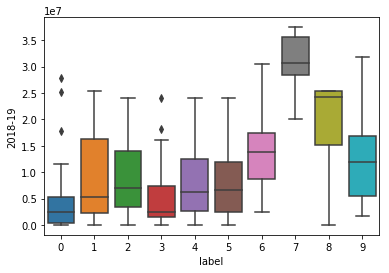

In [3]:
ax = sns.boxplot(x="label", y="2018-19",
            data=data)
plt.show()

We can see that the variability of salaries varies across groups pretty wildly. Groups 0 and 3 seems to have some severly overpaid players, while Group 7 (the bona fide superstars) are (deservedly) making the most money.

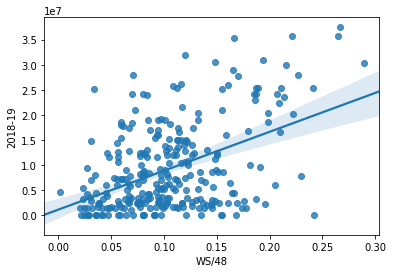

In [17]:
# for all players, plotting win shares per game vs salary
ax = sns.regplot(x="WS/48", y="2018-19",data=data)
plt.show()

In [35]:
fig, ax = plt.subplots(nrows=4, ncols=3,figsize=(8, 4))
def plot_groups(axis, group):
    axis = sns.regplot(x="WS/48", y="2018-19",data=data[data.label==group])
    axis.set_title("Group {}".format(i))

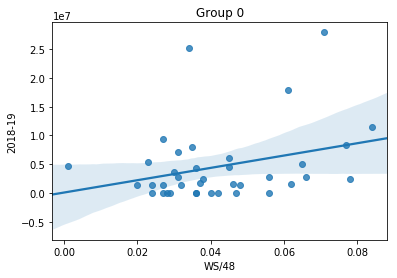

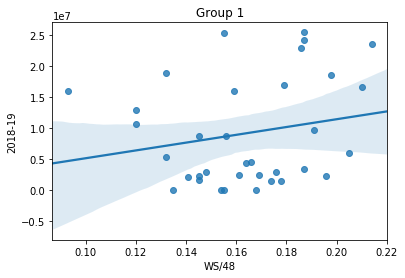

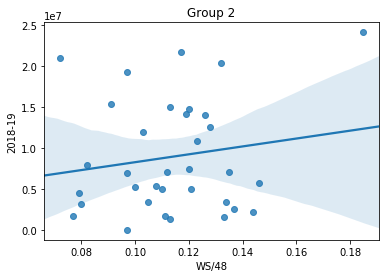

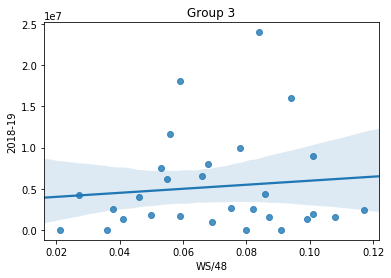

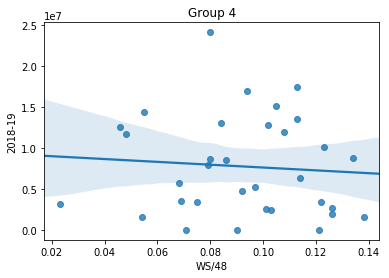

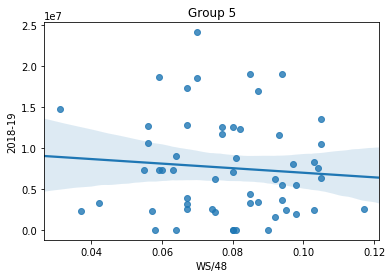

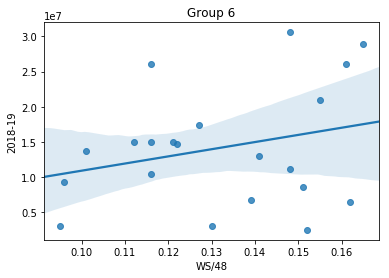

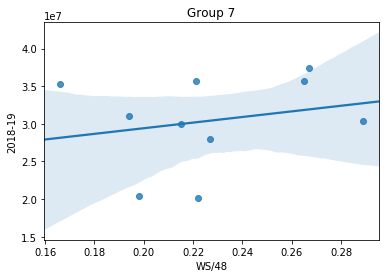

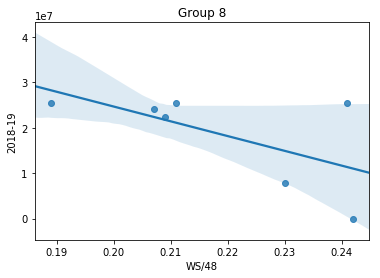

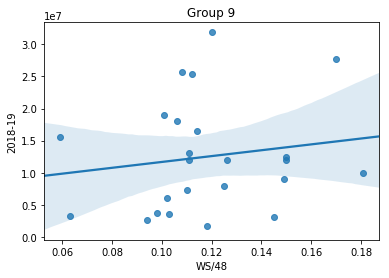

In [43]:
for i in list(range(0,10)):
    axis = sns.regplot(x="WS/48", y="2018-19",data=data[data.label==i])
    axis.set_title("Group {}".format(i))
    plt.show()

In [4]:
analysis_df = data[['Player','Pos','Tm','label','2018-19']]

In [5]:
final_dict = {}
for clus in list(range(10)):
    small_df = analysis_df[analysis_df.label == clus]
    small_df.reset_index(drop=False,inplace=True)
    small_df.loc[:,'percentile'] = small_df['2018-19'].rank(pct=True)
    underpaid = small_df[small_df['percentile'] <= 0.25]['Player'].tolist()
    overpaid = small_df[small_df['percentile'] >= 0.75]['Player'].tolist()
    final_dict[clus] = [underpaid,overpaid]

In [6]:
for key, val in final_dict.items():
    print("In group {}, \nthe most underpaid players are {} and \nthe most overpaid players are {}\n".format(key, val[0], val[1]))

In group 0, 
the most underpaid players are ['Quincy Acy', 'Vince Carter', 'Malcolm Delaney', 'Josh Huestis', 'Jarrett Jack', 'Joe Johnson', 'Patrick McCaw', 'Jameer Nelson', 'Isaiah Taylor', 'Jason Terry'] and 
the most overpaid players are ['Carmelo Anthony', 'Alec Burks', 'Shaun Livingston', 'Ben McLemore', 'Norman Powell', 'Jonathon Simmons', 'Garrett Temple', 'Lance Thomas', 'Evan Turner', 'Andrew Wiggins']

In group 1, 
the most underpaid players are ['Jarrett Allen', 'Jordan Bell', 'Alex Len', 'Kevon Looney', 'Greg Monroe', 'Eric Moreland', 'Daniel Theis', 'David West'] and 
the most overpaid players are ['Steven Adams', 'Joel Embiid', 'Derrick Favors', 'Rudy Gobert', 'Dwight Howard', 'DeAndre Jordan', 'Enes Kanter', 'Jonas Valanciunas', 'Hassan Whiteside']

In group 2, 
the most underpaid players are ['Nemanja Bjelica', 'Josh Hart', 'Jonas Jerebko', 'Maxi Kleber', 'Kyle Kuzma', 'Kelly Oubre', 'Dario Saric', 'Pascal Siakam'] and 
the most overpaid players are ['Ryan Anderson', '